# The main shopping districts and streets in Milan

This is the Notebook realized for the Capstone Project on Data Science.
Main goal: segmenting and clustering 88 homojeneous area in city of Milan in order to answer is there a fashion district.

### Business Problem

The city of Milano is famous for fashion shops and restaurants. According to city government the city is divided into 88 areas considered as homogeneous and called NIL (Local Identity Zones). Available as open data it is possbile to get for all these aresa all the bulding adresses of the city getting from the pubblic authority the latitude, longitude, number, street or square name for each building. Goal of this projetc is clustering city areas and extend the analysis to the specific adresses of a specific zone in order to classify each area of the 88 NIL zones and each building adress into a specific NIL area. Lets consider a costumer how deals with fashion and clothes products how wants to open a new store in Milano. The questions are: which is the most fashion areas where the store are concentrating as fashion district and in this district wich are the most appreciated streets squares in the district. The goal is to answer to an investitor: wich are the more trending fashion districts in Milano and selected one of this district how is possible to get the most trending adresses for fashion shops defined as name of the street or square. In Miano, if someone is looking to open a fashion store, the project will give some indication.

### Data description

Definition of 88 areas (NIL) of Milano and building adresses are available as open data from Comune di Milano: http://dati.comune.milano.it/dataset. The NIL dataframe will defined as latitude, longitude, name of NIL and NIL ID (unique code of the area). In a first key means analysys, it will be tryed to identify the most fashion NIL area. Another dataframe will be downoloaded from Comune di Milano getting the info on Stree/Square Name, Number, Latitude, Longitude and NIL ID. After scrabing the data the dataset on adresses will be joint to the Areas dataset and for a NIL area classified as fashion zone the classification will be extended to the new dataframe of local adresses in order to get the adresses more fashion shops.

In [1]:
import pandas as pd
import numpy as np

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## Part I - Importing and scrabing data from the local administration of Milan

Import the data containing the coordinates of the neighborhood of Milano:

Importing the data of streets and squares, and of demographic on neighborhoods:

In [198]:
# The code was removed by Watson Studio for sharing.

,X,Y,FID_1,FID_1_1,ID_NIL,NIL,AreaHA,AreaMQ
0,9.122746,45.520250,0,0,74,SACCO,70.84658,7.084658e+05
1,9.159979,45.526457,1,1,82,COMASINA,92.67346,9.267346e+05
2,9.121394,45.512246,2,2,75,STEPHENSON,56.00979,5.600979e+05
3,9.136299,45.487326,3,3,66,QT 8,102.44374,1.024437e+06
4,9.230270,45.453417,4,4,29,ORTOMERCATO,140.25196,1.402520e+06


In [199]:
df_data_neigh=df_data_neigh.drop(columns=['FID_1', 'FID_1_1'])
df_data_neigh.head()

,X,Y,ID_NIL,NIL,AreaHA,AreaMQ
0,9.122746,45.520250,74,SACCO,70.84658,7.084658e+05
1,9.159979,45.526457,82,COMASINA,92.67346,9.267346e+05
2,9.121394,45.512246,75,STEPHENSON,56.00979,5.600979e+05
3,9.136299,45.487326,66,QT 8,102.44374,1.024437e+06
4,9.230270,45.453417,29,ORTOMERCATO,140.25196,1.402520e+06


In [200]:
df_data_neigh.shape

(88, 6)

In [243]:
indir='http://dati.comune.milano.it/dataset/5c6519f6-6d26-41c9-b53b-6106e08d1b90/resource/533b4e63-3d78-4bb5-aeb4-6c5f648f7f21/download/ds634_civici_coordinategeografiche_20200107_csv.zip'
df_indir = pd.read_csv(indir, sep=";")

In [239]:
df_indir.head()

,CODICE_VIA,STATO,TIPO,DENOMINAZIONE,DATA_INTITOLAZIONE,ANNO_SOPPRESSIONE,DESCRITTIVO,ANNCSU,OPENSTREETMAP,PROGANNCSU,...,WEBMERC_Y,DATA_MODFINE,IDMASTER,PASSOCARRAIO,LIVELLO,CAP,ID_NIL,LONG_WGS84,LAT_WGS84,Location
0,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,"5695001,4487",0,231315,0.0,A raso,NaN,NaN,9.189375,45.464847,"45.4648471777, 9.1893750655"
1,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,"5695003,8802",0,12,0.0,A raso,20121.0,1.0,9.189250,45.464862,"45.4648624969, 9.18925000834"
2,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,"5695001,0281",0,231259,0.0,A raso,NaN,NaN,9.189836,45.464845,"45.4648445278, 9.18983625158"
3,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,"5695001,4448",0,231322,0.0,A raso,NaN,NaN,9.189483,45.464847,"45.4648471532, 9.18948344275"
4,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,"5695001,329",0,231314,0.0,A raso,NaN,NaN,9.189314,45.464846,"45.4648464236, 9.18931409415"


In [242]:
df_indir=df_indir.drop(columns=['NIL'], axis=1)
df_indir.head()

KeyError: "['NIL'] not found in axis"

In [241]:
df_indir_ext=df_indir.join(df_data_neigh.set_index('ID_NIL'), on='ID_NIL')
df_indir_ext.head()

,CODICE_VIA,STATO,TIPO,DENOMINAZIONE,DATA_INTITOLAZIONE,ANNO_SOPPRESSIONE,DESCRITTIVO,ANNCSU,OPENSTREETMAP,PROGANNCSU,...,CAP,ID_NIL,LONG_WGS84,LAT_WGS84,Location,X,Y,NIL,AreaHA,AreaMQ
0,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,NaN,NaN,9.189375,45.464847,"45.4648471777, 9.1893750655",NaN,NaN,NaN,NaN,NaN
1,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,20121.0,1.0,9.189250,45.464862,"45.4648624969, 9.18925000834",9.186948,45.463707,DUOMO,234.17041,2.341704e+06
2,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,NaN,NaN,9.189836,45.464845,"45.4648445278, 9.18983625158",NaN,NaN,NaN,NaN,NaN
3,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,NaN,NaN,9.189483,45.464847,"45.4648471532, 9.18948344275",NaN,NaN,NaN,NaN,NaN
4,1,Attiva,Piazza,DUOMO (DEL),17000101.0,0.0,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,...,NaN,NaN,9.189314,45.464846,"45.4648464236, 9.18931409415",NaN,NaN,NaN,NaN,NaN


In [244]:
df_indir_ext.shape

(62793, 41)

In [245]:
df_plot=df_indir_ext[['DESCRITTIVO','NIL']]
df_plot=df_plot.groupby(['NIL']).count()

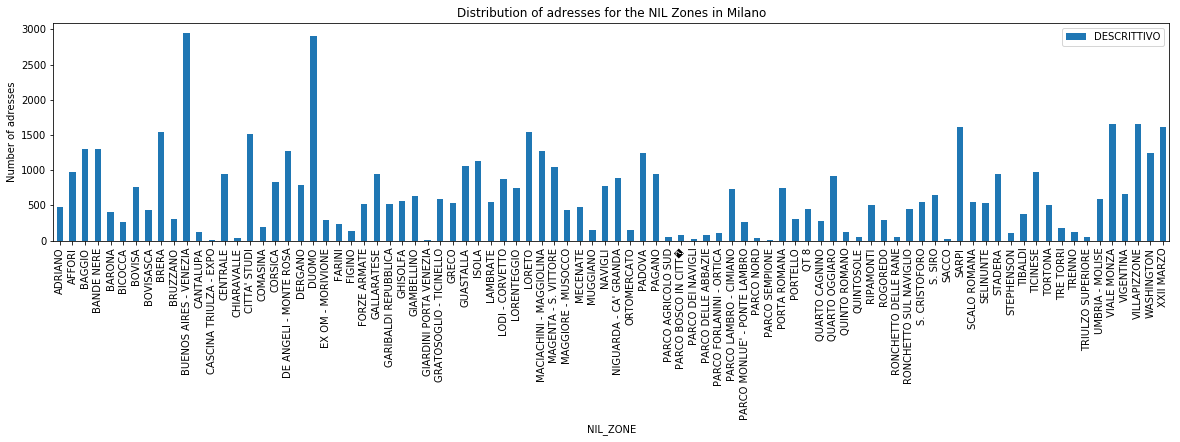

In [246]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_plot.plot(kind='bar', figsize=(20, 4))

plt.xlabel('NIL_ZONE') # add to x-label to the plot
plt.ylabel('Number of adresses') # add y-label to the plot
plt.title('Distribution of adresses for the NIL Zones in Milano') # add title to the plot

plt.show()

In [247]:
df_focus=df_indir_ext[df_indir_ext['NIL'].str.contains('BUENOS')==True]

In [248]:
df_focus.head()

,CODICE_VIA,STATO,TIPO,DENOMINAZIONE,DATA_INTITOLAZIONE,ANNO_SOPPRESSIONE,DESCRITTIVO,ANNCSU,OPENSTREETMAP,PROGANNCSU,...,CAP,ID_NIL,LONG_WGS84,LAT_WGS84,Location,X,Y,NIL,AreaHA,AreaMQ
14939,2095,Attiva,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,NaN,...,20129.0,21.0,9.217854,45.475205,"45.4752047823, 9.21785389052",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14940,2095,Attiva,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,NaN,...,20129.0,21.0,9.218323,45.474960,"45.4749601462, 9.2183230276",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14941,2095,Attiva,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,NaN,...,20129.0,21.0,9.218348,45.475772,"45.4757722368, 9.21834803759",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14942,2095,Attiva,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,NaN,...,20129.0,21.0,9.218318,45.475249,"45.4752486804, 9.21831817759",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14943,2095,Attiva,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,NaN,...,20129.0,21.0,9.217720,45.475205,"45.4752050374, 9.21771972354",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06


In [249]:
ADR=df_focus['TIPO']+" "+df_focus['DESCRITTIVO']+" "+df_focus['NUMERO'].astype(str)
df_focus.insert(2, "ADRESS", ADR, True)

In [250]:
df_focus.head()

,CODICE_VIA,STATO,ADRESS,TIPO,DENOMINAZIONE,DATA_INTITOLAZIONE,ANNO_SOPPRESSIONE,DESCRITTIVO,ANNCSU,OPENSTREETMAP,...,CAP,ID_NIL,LONG_WGS84,LAT_WGS84,Location,X,Y,NIL,AreaHA,AreaMQ
14939,2095,Attiva,Via AMEDEO D'AOSTA 11,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,...,20129.0,21.0,9.217854,45.475205,"45.4752047823, 9.21785389052",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14940,2095,Attiva,Via AMEDEO D'AOSTA 6,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,...,20129.0,21.0,9.218323,45.474960,"45.4749601462, 9.2183230276",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14941,2095,Attiva,Via AMEDEO D'AOSTA 15,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,...,20129.0,21.0,9.218348,45.475772,"45.4757722368, 9.21834803759",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14942,2095,Attiva,Via AMEDEO D'AOSTA 8,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,...,20129.0,21.0,9.218318,45.475249,"45.4752486804, 9.21831817759",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06
14943,2095,Attiva,Via AMEDEO D'AOSTA 11,Via,AMEDEO D'AOSTA,0.0,0.0,AMEDEO D'AOSTA,AMEDEO D'AOSTA,AMEDEO D'AOSTA,...,20129.0,21.0,9.217720,45.475205,"45.4752050374, 9.21771972354",9.214489,45.477025,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06


In [251]:
df_focus=df_focus[['ADRESS', 'NIL','LONG_WGS84','LAT_WGS84']]
df_focus.drop_duplicates(subset ="ADRESS", 
                     keep = False, inplace = True) 
df_focus.head()

,ADRESS,NIL,LONG_WGS84,LAT_WGS84
14940,Via AMEDEO D'AOSTA 6,BUENOS AIRES - VENEZIA,9.218323,45.474960
14942,Via AMEDEO D'AOSTA 8,BUENOS AIRES - VENEZIA,9.218318,45.475249
14951,Via AMEDEO D'AOSTA 13,BUENOS AIRES - VENEZIA,9.218119,45.475452
14952,Via AMEDEO D'AOSTA 10,BUENOS AIRES - VENEZIA,9.218410,45.475447
14953,Via AMEDEO D'AOSTA 2,BUENOS AIRES - VENEZIA,9.218759,45.474509


In [252]:
df_focus=df_focus.sample(50)
df_focus.reset_index(inplace = True) 
df_focus=df_focus[['ADRESS', 'NIL', 'LONG_WGS84','LAT_WGS84']]

## Part II - Clustering city of Milano

Checking the shape of the dataframe (Boroughs, Adresses, Lat, Long):

In [19]:
print('The dataframe has {} boroughs and {} adresses.'.format(
        len(df_focus['NIL'].unique()),
        df_focus.shape[0]
    )
)

The dataframe has 1 boroughs and 50 adresses.


Getting the center of the maps with geolocator for the city of Milano:

In [20]:
from geopy.geocoders import Nominatim
address = 'Milano'

geolocator = Nominatim(user_agent="milano_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milano are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milano are 45.4668, 9.1905.


Displaying the map centered on Milano showing the position of all the adresses:

In [35]:
# create map of Milano using latitude and longitude values
map_milano = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough in zip(df_data_neigh['Y'], df_data_neigh['X'], df_data_neigh['NIL']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milano)  
    
map_milano

In [39]:
# The code was removed by Watson Studio for sharing.

Deifne a function for calling Foursquare API for each record of the dataframe: Borough and Neighborhood:

In [133]:
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
        id_tipo)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Collecting all the venues for Milano:

In [41]:
milano_venues = getNearbyVenues(names=df_data_neigh['NIL'],
                                   latitudes=df_data_neigh['Y'],
                                   longitudes=df_data_neigh['X']
                                  )

SACCO
COMASINA
STEPHENSON
QT 8
ORTOMERCATO
MAGGIORE - MUSOCCO
PARCO LAMBRO - CIMIANO
GALLARATESE
S. SIRO
GHISOLFA
BAGGIO
QUARTO CAGNINO
LORENTEGGIO
GIAMBELLINO
S. CRISTOFORO
RONCHETTO SUL NAVIGLIO
TIBALDI
CASCINA TRIULZA - EXPO
QUARTO OGGIARO
AFFORI
PADOVA
EX OM - MORIVIONE
ADRIANO
FARINI
UMBRIA - MOLISE
TRIULZO SUPERIORE
CORSICA
CITTA' STUDI
SELINUNTE
PARCO MONLUE' - PONTE LAMBRO
NIGUARDA - CA' GRANDA
STADERA
GUASTALLA
BRERA
DUOMO
SCALO ROMANA
MAGENTA - S. VITTORE
BOVISASCA
LODI - CORVETTO
LAMBRATE
BARONA
BRUZZANO
TRENNO
GRATOSOGLIO - TICINELLO
FIGINO
QUINTO ROMANO
PARCO AGRICOLO SUD
VILLAPIZZONE
BOVISA
DERGANO
PARCO NORD
BICOCCA
MUGGIANO
PORTELLO
TRE TORRI
PARCO SEMPIONE
GIARDINI PORTA VENEZIA
TORTONA
NAVIGLI
XXII MARZO
BUENOS AIRES - VENEZIA
QUINTOSOLE
RONCHETTO DELLE RANE
CHIARAVALLE
PARCO DELLE ABBAZIE
ROGOREDO
MECENATE
RIPAMONTI
VIALE MONZA
CENTRALE
GRECO
LORETO
PARCO FORLANINI - ORTICA
MACIACHINI - MAGGIOLINA
ISOLA
SARPI
DE ANGELI - MONTE ROSA
WASHINGTON
BANDE NERE
FORZE ARMATE


Showing dataframe of all the venues find in Milano:

In [42]:
milano_venues.shape

(913, 7)

In [43]:
export=milano_venues[['Venue Latitude','Venue Longitude','Venue Category','Venue']]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(export)

     Venue Latitude  Venue Longitude              Venue Category  \
0         45.525262         9.115894              Clothing Store   
1         45.524253         9.161546              Clothing Store   
2         45.521046         9.149846               Luggage Store   
3         45.509964         9.130594                    Boutique   
4         45.490472         9.146811              Clothing Store   
5         45.490389         9.146280              Clothing Store   
6         45.490617         9.146528              Clothing Store   
7         45.490589         9.145951              Lingerie Store   
8         45.490598         9.145946              Lingerie Store   
9         45.489987         9.146220                 Men's Store   
10        45.490875         9.147033                  Board Shop   
11        45.494757         9.141245                 Men's Store   
12        45.490771         9.146266           Accessories Store   
13        45.458101         9.219998            

Counting the total number of Venue Category found in Milano:

In [44]:
print('There are {} uniques categories.'.format(len(milano_venues['Venue Category'].unique())))

There are 21 uniques categories.


Checking for empty records:

In [50]:
milano_venues.groupby('Neighborhood').count().sort_values(by=['Venue'],ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
DUOMO,50,50,50,50,50,50
GUASTALLA,50,50,50,50,50,50
GIARDINI PORTA VENEZIA,50,50,50,50,50,50
BRERA,50,50,50,50,50,50
BUENOS AIRES - VENEZIA,50,50,50,50,50,50
CENTRALE,49,49,49,49,49,49
WASHINGTON,42,42,42,42,42,42
PAGANO,36,36,36,36,36,36
PARCO SEMPIONE,36,36,36,36,36,36


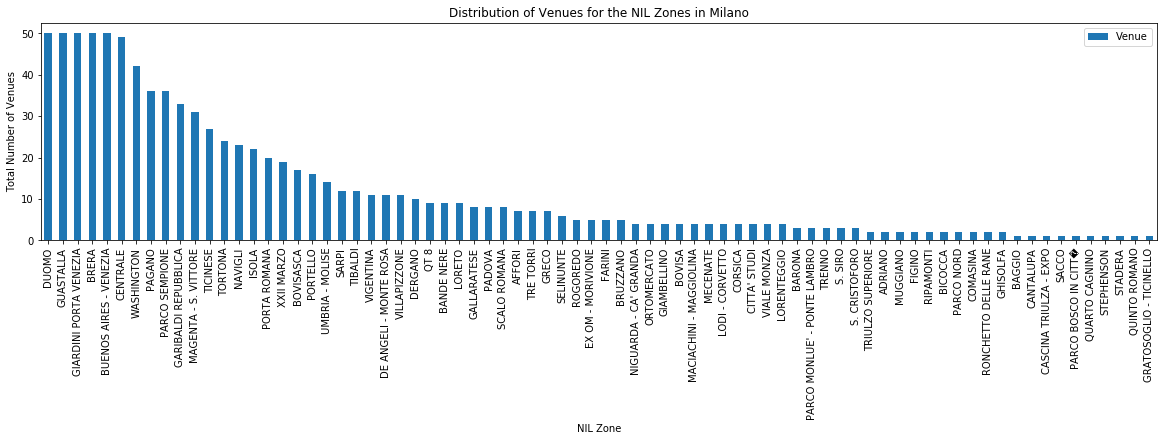

In [56]:
df_plot=milano_venues.groupby('Neighborhood').count().sort_values(by=['Venue'],ascending=False)
df_plot=df_plot[['Venue']]

df_plot.plot(kind='bar', figsize=(20, 4))

plt.xlabel('NIL Zone') # add to x-label to the plot
plt.ylabel('Total Number of Venues') # add y-label to the plot
plt.title('Distribution of Venues for the NIL Zones in Milano') # add title to the plot

plt.show()

Shaping the Venue Categories and numbers:

In [57]:
# one hot encoding
milano_onehot = pd.get_dummies(milano_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
milano_onehot['Neighborhood'] = milano_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [milano_onehot.columns[-1]] + list(milano_onehot.columns[:-1])
milano_onehot = milano_onehot[fixed_columns]

milano_onehot.head()

,Neighborhood,Accessories Store,Baby Store,Board Shop,Boutique,Bridal Shop,Clothing Store,Construction & Landscaping,Furniture / Home Store,Jewelry Store,...,Luggage Store,Men's Store,Motorcycle Shop,Office,Outlet Mall,Outlet Store,Salon / Barbershop,Shoe Store,Sporting Goods Shop,Women's Store
0,SACCO,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,COMASINA,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,COMASINA,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,STEPHENSON,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,QT 8,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
milano_onehot.shape

(913, 22)

Gruoping the different Neighborhoods accounting the Venues:

In [59]:
milano_grouped = milano_onehot.groupby('Neighborhood').sum().reset_index()
milano_grouped

,Neighborhood,Accessories Store,Baby Store,Board Shop,Boutique,Bridal Shop,Clothing Store,Construction & Landscaping,Furniture / Home Store,Jewelry Store,...,Luggage Store,Men's Store,Motorcycle Shop,Office,Outlet Mall,Outlet Store,Salon / Barbershop,Shoe Store,Sporting Goods Shop,Women's Store
0,ADRIANO,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,AFFORI,0,0,0,4,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BAGGIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BANDE NERE,1,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,2,2,0
4,BARONA,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,0
5,BICOCCA,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,BOVISA,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,BOVISASCA,1,0,0,0,0,9,0,0,0,...,1,1,0,0,0,0,0,3,0,1
8,BRERA,2,0,0,23,0,16,0,0,1,...,0,4,0,0,0,0,0,2,0,2
9,BRUZZANO,0,0,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
milano_grouped.shape

(76, 22)

Find the top-5 Venues for each Neighborhood:

In [61]:
num_top_venues = 10

for hood in milano_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = milano_grouped[milano_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ADRIANO----
                 venue  freq
0           Shoe Store   1.0
1       Clothing Store   1.0
2    Accessories Store   0.0
3        Luggage Store   0.0
4  Sporting Goods Shop   0.0
5   Salon / Barbershop   0.0
6         Outlet Store   0.0
7          Outlet Mall   0.0
8               Office   0.0
9      Motorcycle Shop   0.0


----AFFORI----
                 venue  freq
0             Boutique   4.0
1       Clothing Store   2.0
2           Kids Store   1.0
3    Accessories Store   0.0
4          Men's Store   0.0
5  Sporting Goods Shop   0.0
6           Shoe Store   0.0
7   Salon / Barbershop   0.0
8         Outlet Store   0.0
9          Outlet Mall   0.0


----BAGGIO----
                 venue  freq
0       Lingerie Store   1.0
1        Luggage Store   0.0
2  Sporting Goods Shop   0.0
3           Shoe Store   0.0
4   Salon / Barbershop   0.0
5         Outlet Store   0.0
6          Outlet Mall   0.0
7               Office   0.0
8      Motorcycle Shop   0.0
9          Men's Store

Ording the Venue Category form the most common to the less:

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [122]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = milano_grouped['Neighborhood']

for ind in np.arange(milano_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milano_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,Shoe Store,Clothing Store,Women's Store,Kids Store,Baby Store,Board Shop,Boutique,Bridal Shop,Construction & Landscaping,Furniture / Home Store
1,AFFORI,Boutique,Clothing Store,Kids Store,Women's Store,Baby Store,Board Shop,Bridal Shop,Construction & Landscaping,Furniture / Home Store,Jewelry Store
2,BAGGIO,Lingerie Store,Kids Store,Baby Store,Board Shop,Boutique,Bridal Shop,Clothing Store,Construction & Landscaping,Furniture / Home Store,Jewelry Store
3,BANDE NERE,Shoe Store,Clothing Store,Sporting Goods Shop,Lingerie Store,Luggage Store,Accessories Store,Office,Motorcycle Shop,Men's Store,Outlet Mall
4,BARONA,Shoe Store,Men's Store,Women's Store,Jewelry Store,Baby Store,Board Shop,Boutique,Bridal Shop,Clothing Store,Construction & Landscaping


Set the number of cluster (after different trials founding empty clusters):

In [123]:
# set number of clusters
kclusters = 10

milano_grouped_clustering = milano_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(milano_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([8, 2, 8, 2, 8, 8, 8, 0, 7, 2], dtype=int32)

Analysis of all the boroughs:

In [124]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

milano_merged = df_data_neigh

milano_merged = milano_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='NIL')

milano_merged.head() # check the last columns!

,X,Y,ID_NIL,NIL,AreaHA,AreaMQ,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9.122746,45.520250,74,SACCO,70.84658,7.084658e+05,8.0,Clothing Store,Women's Store,Kids Store,Baby Store,Board Shop,Boutique,Bridal Shop,Construction & Landscaping,Furniture / Home Store,Jewelry Store
1,9.159979,45.526457,82,COMASINA,92.67346,9.267346e+05,8.0,Clothing Store,Luggage Store,Women's Store,Kids Store,Baby Store,Board Shop,Boutique,Bridal Shop,Construction & Landscaping,Furniture / Home Store
2,9.121394,45.512246,75,STEPHENSON,56.00979,5.600979e+05,8.0,Boutique,Women's Store,Kids Store,Baby Store,Board Shop,Bridal Shop,Clothing Store,Construction & Landscaping,Furniture / Home Store,Jewelry Store
3,9.136299,45.487326,66,QT 8,102.44374,1.024437e+06,2.0,Clothing Store,Lingerie Store,Men's Store,Board Shop,Accessories Store,Outlet Mall,Office,Motorcycle Shop,Outlet Store,Luggage Store
4,9.230270,45.453417,29,ORTOMERCATO,140.25196,1.402520e+06,2.0,Clothing Store,Lingerie Store,Construction & Landscaping,Kids Store,Baby Store,Board Shop,Boutique,Bridal Shop,Furniture / Home Store,Jewelry Store


In [125]:
milano_merged[milano_merged['NIL'].str.contains('BUENOS')==True]

,X,Y,ID_NIL,NIL,AreaHA,AreaMQ,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,9.214489,45.477025,21,BUENOS AIRES - VENEZIA,287.75423,2.877542e+06,5.0,Clothing Store,Shoe Store,Women's Store,Men's Store,Kids Store,Lingerie Store,Office,Motorcycle Shop,Outlet Mall,Luggage Store


In [254]:
milano_merged[milano_merged['Cluster Labels']==1]

,X,Y,ID_NIL,NIL,AreaHA,AreaMQ,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,9.201891,45.463219,4,GUASTALLA,154.80207,1.548021e+06,1.0,Clothing Store,Boutique,Women's Store,Accessories Store,Men's Store,Outlet Store,Furniture / Home Store,Baby Store,Board Shop,Shoe Store
34,9.186948,45.463707,1,DUOMO,234.17041,2.341704e+06,1.0,Clothing Store,Boutique,Women's Store,Accessories Store,Outlet Store,Furniture / Home Store,Baby Store,Board Shop,Shoe Store,Bridal Shop


## Part III - Analysis of the results

Showing the clusters of the Borough selected:

In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(milano_merged['Y'], milano_merged['X'], milano_merged['NIL'], milano_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

Interesting Cluster 0 is well charachterized by Park but not by restaurants:

In [128]:
milano_merged.loc[milano_merged['Cluster Labels'] == 1]

,X,Y,ID_NIL,NIL,AreaHA,AreaMQ,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,9.201891,45.463219,4,GUASTALLA,154.80207,1.548021e+06,1.0,Clothing Store,Boutique,Women's Store,Accessories Store,Men's Store,Outlet Store,Furniture / Home Store,Baby Store,Board Shop,Shoe Store
34,9.186948,45.463707,1,DUOMO,234.17041,2.341704e+06,1.0,Clothing Store,Boutique,Women's Store,Accessories Store,Outlet Store,Furniture / Home Store,Baby Store,Board Shop,Shoe Store,Bridal Shop


In [129]:
df_clust=milano_merged.groupby(['NIL']).mean()
df_clust.dropna()
df_clust.head()

,X,Y,ID_NIL,AreaHA,AreaMQ,Cluster Labels
NIL,,,,,,
ADRIANO,9.248366,45.514087,17,243.15601,2.431560e+06,8.0
AFFORI,9.171293,45.513926,80,207.08936,2.070894e+06,2.0
BAGGIO,9.087175,45.459587,55,347.86000,3.478600e+06,8.0
BANDE NERE,9.139080,45.459914,52,266.38809,2.663881e+06,2.0
BARONA,9.156192,45.432353,46,200.63246,2.006325e+06,8.0


In [130]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clust['Y'], df_clust['X'], df_clust['ID_NIL'], df_clust['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

In [253]:
# create map of Milano using latitude and longitude values
map_milano_focus = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, borough in zip(df_focus['LAT_WGS84'], df_focus['LONG_WGS84'], df_focus['ADRESS']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milano_focus)  
    
map_milano_focus

In [255]:
def getNearbyVenues_dett(names, latitudes, longitudes, radius=250):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
        id_tipo)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [257]:
df_focus.dropna()
df = pd.DataFrame(pd.np.empty((0, 4)))    
milano_venues_dett = getNearbyVenues_dett(names=df_focus['ADRESS'],
                                   latitudes=df_focus['LAT_WGS84'],
                                   longitudes=df_focus['LONG_WGS84']
                                  )

Via BARTOLOMEO EUSTACHI 29
Viale ABRUZZI 66
Via DELLA MAJELLA 11
Via GIROLAMO FRESCOBALDI 12
Via GIOVANNI PASCOLI 28
Via CASTEL MORRONE 20
Via ANTONIO STRADIVARI 6
Via BENEDETTO MARCELLO 63
Via BARTOLOMEO EUSTACHI 31
Via OLINDO GUERRINI 13
Via ACHILLE MAIOCCHI 15
Via GIORGIO JAN 18
Piazzale LAVATER 5
Via CARLO PISACANE 33
Viale DEI MILLE 23
Via ANTONIO STOPPANI 2
Via NICOLA ANTONIO PORPORA 24
Via CARLO POERIO 35
Via LUIGI VANVITELLI 46
Via CARLO PISACANE 22
Via GIUSEPPE LUOSI 43
Viale GRAN SASSO 26
Via GIORGIO JAN 14
Viale GRAN SASSO 16
Via GIUSEPPE SIRTORI 4
Via CLAUDIO MONTEVERDI 9
Via RODOLFO FARNETI 11
Via FELICE CASATI 7
Via ANTONIO STOPPANI 38
Via PAOLO FRISI 11
Via GIUSEPPE LUOSI 6
Via NICCOLO' PAGANINI 14
Viale GRAN SASSO 44
Viale REGINA GIOVANNA 3
Via MELZO 10
Via PAOLO FRISI 2
Viale DEI MILLE 36
Corso BUENOS AIRES 8
Via LUIGI BOCCHERINI 9
Via BENEDETTO MARCELLO 8
Via APOLLODORO 6
Via ERRICO PETRELLA 8
Via PINTURICCHIO 29
Via GAROFALO 37
Via GIAN BATTISTA TIEPOLO 36
Via ULISSE

In [258]:
milano_venues_dett.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Via BARTOLOMEO EUSTACHI 29,45.477257,9.214533,Mgstampa,45.477651,9.211708,Clothing Store
1,Via BARTOLOMEO EUSTACHI 29,45.477257,9.214533,Canadian,45.479034,9.212954,Clothing Store
2,Via BARTOLOMEO EUSTACHI 29,45.477257,9.214533,Temporary Shop,45.477101,9.216572,Women's Store
3,Via BARTOLOMEO EUSTACHI 29,45.477257,9.214533,MaClò,45.479503,9.214668,Women's Store
4,Via BARTOLOMEO EUSTACHI 29,45.477257,9.214533,Ago e Spago,45.478901,9.213619,Shoe Store


In [261]:
acc_venues=milano_venues_dett.groupby('Neighborhood').count().sort_values(by=['Venue'],ascending=False)
acc_venues.head(10)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Viale REGINA GIOVANNA 3,31,31,31,31,31,31
Via ULISSE ALDROVANDI 5,30,30,30,30,30,30
Piazzale LAVATER 5,29,29,29,29,29,29
Via FELICE CASATI 7,28,28,28,28,28,28
Via GIORGIO JAN 14,26,26,26,26,26,26
Via GIORGIO JAN 18,25,25,25,25,25,25
Corso BUENOS AIRES 8,25,25,25,25,25,25
Via BENEDETTO MARCELLO 8,22,22,22,22,22,22
Via PAOLO FRISI 2,19,19,19,19,19,19


In [262]:
acc_venues.loc[acc_venues['Venue'] >= 17]

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Viale REGINA GIOVANNA 3,31,31,31,31,31,31
Via ULISSE ALDROVANDI 5,30,30,30,30,30,30
Piazzale LAVATER 5,29,29,29,29,29,29
Via FELICE CASATI 7,28,28,28,28,28,28
Via GIORGIO JAN 14,26,26,26,26,26,26
Via GIORGIO JAN 18,25,25,25,25,25,25
Corso BUENOS AIRES 8,25,25,25,25,25,25
Via BENEDETTO MARCELLO 8,22,22,22,22,22,22
Via PAOLO FRISI 2,19,19,19,19,19,19
